<a href="https://colab.research.google.com/github/Aman20kumarz/Cardiovascular_risk_prediction/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project by Aman kumar**

# **Github link :-**https://github.com/Aman20kumarz/Cardiovascular_risk_prediction




Project Type :- Classification

# **Project title: Cardiovascular risk prediction**
## **Problem Description:**

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 18.6 million lives each year, which accounts for 33% of all the global deaths. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

Our main aim here is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).



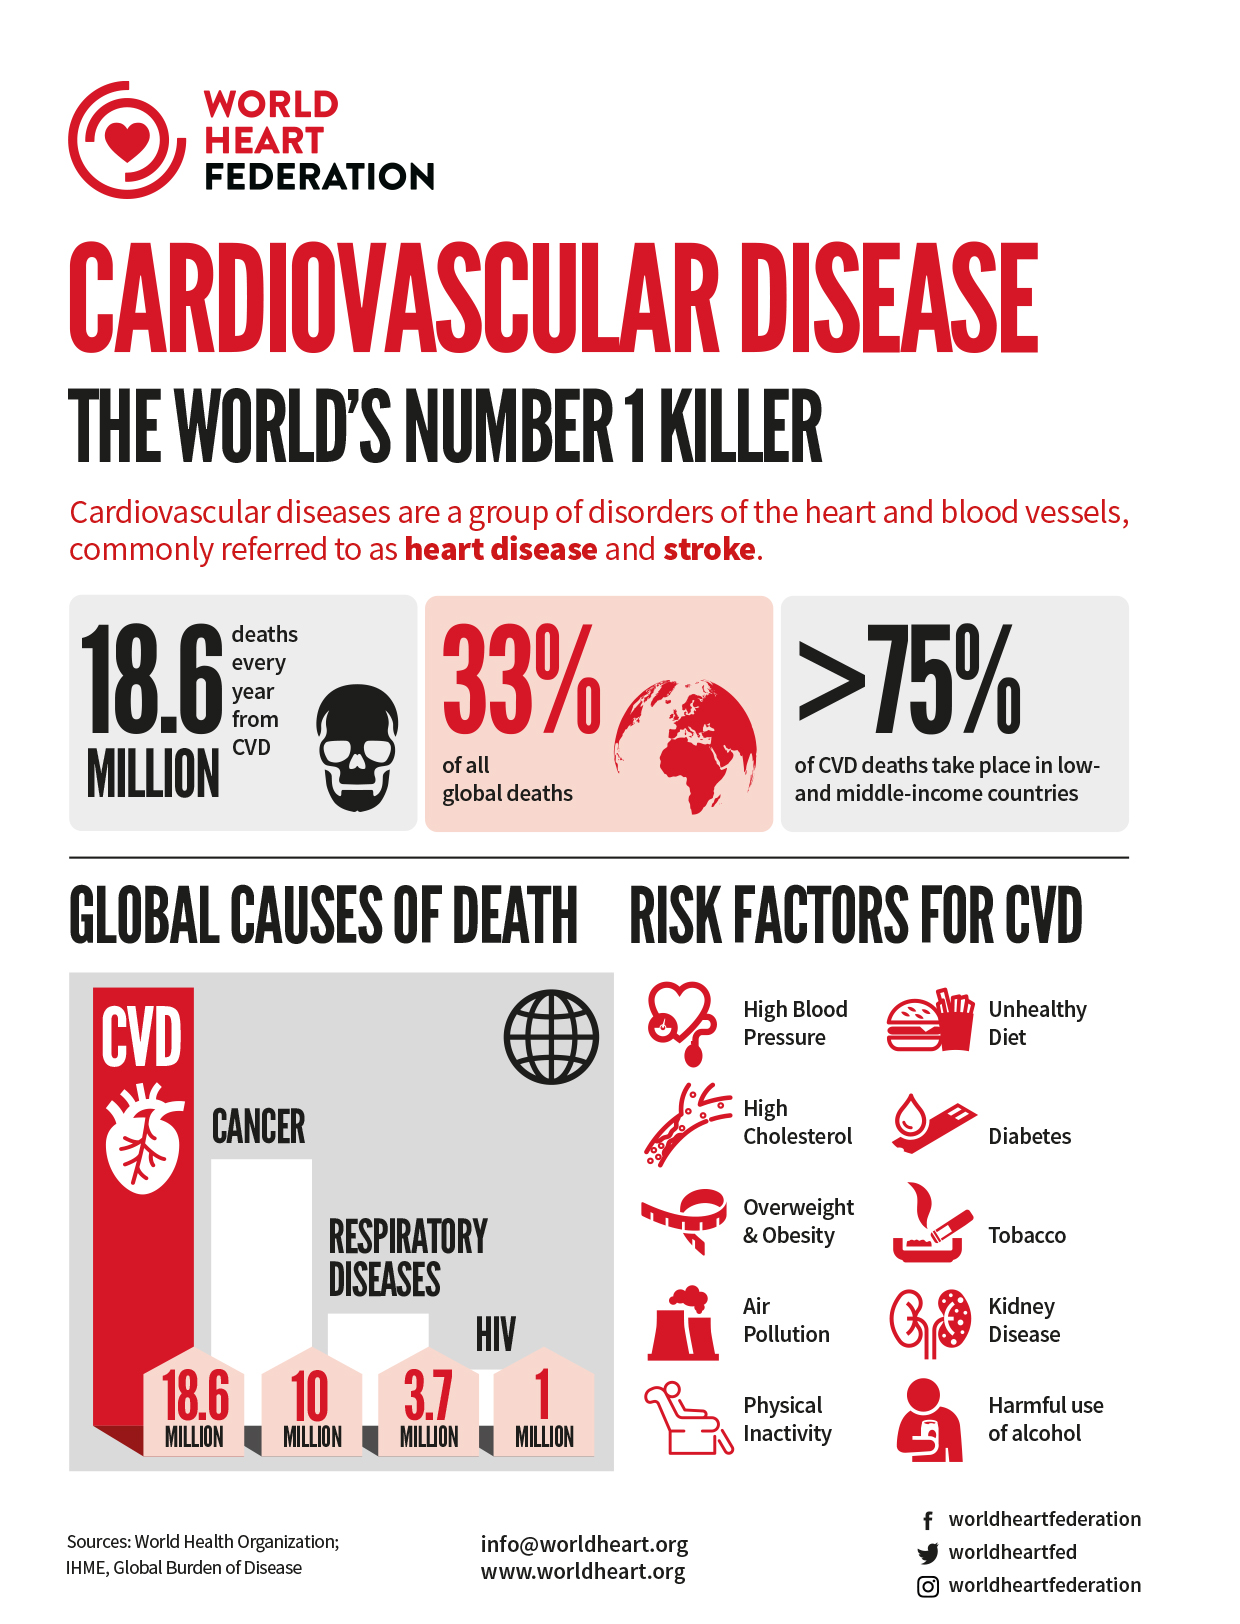

## **Data description:**

The problem and aim stated above can be solved with the help of machine learning models and the data that we have. The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## **Variables:**

Each attribute is a potential risk factor. These attributes include demographic, behavioral, and medical risk factors.

## **Defining the columns:**

## **Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

## **Behavioral:**
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

## **Medical( history):**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

## **Medical(current):**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

## **Predict variable (desired target):**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

## **Project Flowchart:**

1. Initial preparations(Loading the dependencies and the data)

2. EDA

3. Clean-Up

4. Feature engineering

5. Pre processing of the data

6. Model implementation

7. Model explainability

## **1. Initial preparations:**

In [ ]:
#Importing the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
crp_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_cardiovascular_risk (1).csv")

## **2. EDA:**

In [ ]:
crp_df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:

#Last 5 observations
crp_df.tail()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
#Shape of the dataset
crp_df.shape

(3390, 17)

We have 3,390 observations and 17 columns

In [ ]:
#looking at the columns
crp_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#A concise summary of the dataframe
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Statistical description of the dataframe
crp_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#Checking the distribution of the target variable
crp_df['TenYearCHD'].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

In [ ]:
#A function to produce visualisations for gaining insights and doing analysis
def create_visualisation(col: str, factor :str = 'Diabetes', data : pd.DataFrame = crp_df, t_col: str = 'TenYearCHD',\
                         vis_type: str= 'barplot',percent: bool = False):
  """A function that gives a visualisation which shows the
     effect of a  particular variable on the target variable.
     Also checks for the impact percentage if specified by the user."""

  plt.figure(figsize=(12,10))

  #For Barplot visualisation
  if vis_type == 'barplot':
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    sns.barplot(data=analysis_df, x=col, y=t_col)
    plt.title(f'Distribution of positive cases of CHD over different categories of column {col.capitalize()}',size=18)

  #For Countplot visualisation
  if vis_type == 'countplot':
    sns.countplot(x=data[col],hue=data[t_col])
    plt.title(f'The effect of column {col.capitalize()} on the target column {t_col}',size=20)
    plt.legend(['No Risk','At Risk'])

  #For Lineplot visualisation
  if vis_type == 'lineplot':
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    plt.plot(analysis_df[col],analysis_df[t_col])
    plt.title(f'Distribution of positive cases of CHD over different values of column {col.capitalize()}',size=18)

  #General plot adjusting commands
  plt.xlabel(col.capitalize(),size=15)
  plt.ylabel(t_col,size=15)
  plt.show()

  #To calculate the impact percentage of a particular column
  if percent == True:
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    count_df = data[col].value_counts().reset_index()
    p = math.ceil(((analysis_df.loc[1][1]/count_df.loc[1][1]) - (analysis_df.loc[0][1]/count_df.loc[0][1]))*100)
    print(f'\nAnalysis result: \n{factor} increases the chances of a positive CHD risk factor by around {p}%')


## **Which age group is the most likely to have a positive CHD risk factor.**

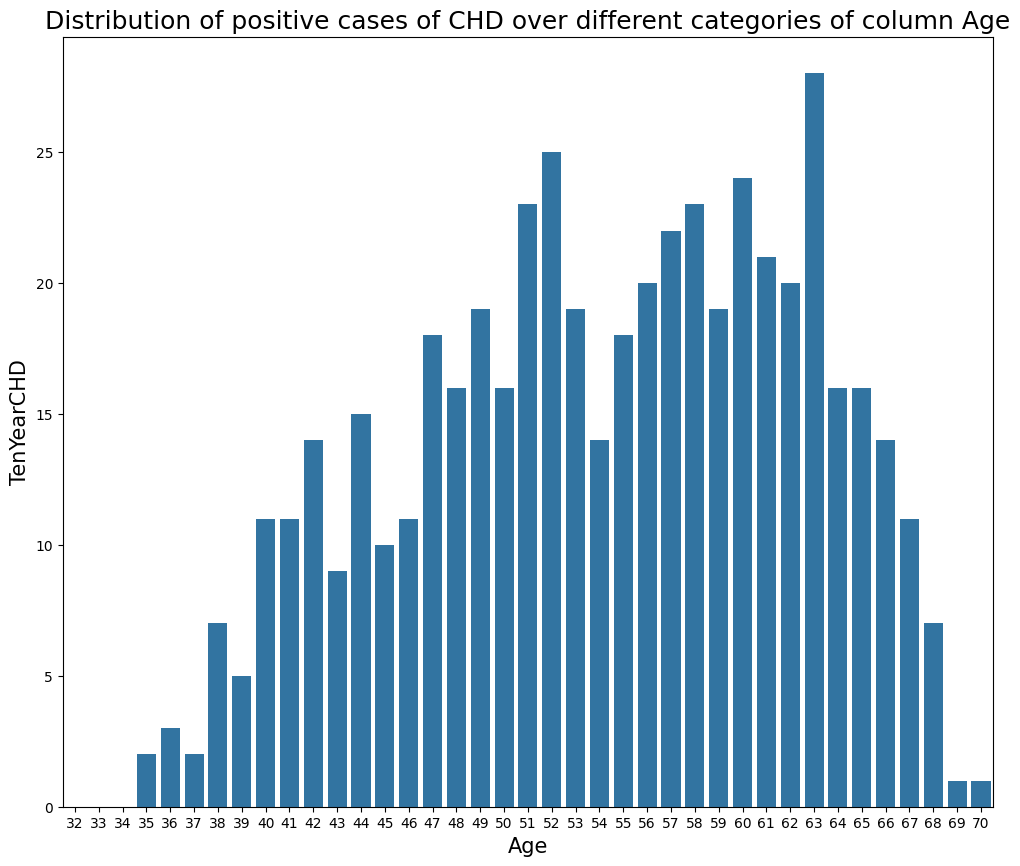

In [ ]:
#Analysis of the column Age
create_visualisation(col='age')

As we can see, the age group that is most likely to have a posititve CHD risk factor is from 47 to 65.

## **Does the education level affect the ten year CVD risk factor:**

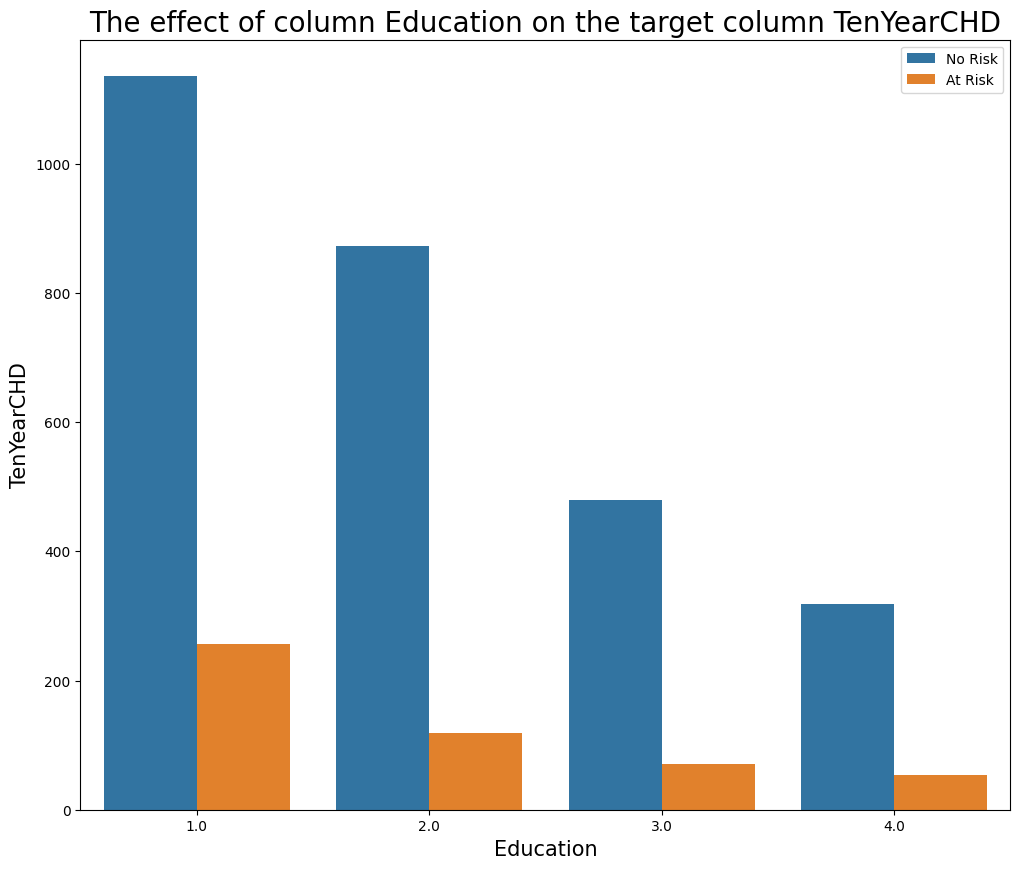

In [ ]:
#Analysis of the column education
create_visualisation(col='education',vis_type='countplot')

As we can see that, most of the "At Risk" cases are in the 1st level of education and least in the 4th level. This is a pretty misleading result because the number of "At Risk" cases here seems to be affected by the total number of people in that category. Therefore we can infer that this is not a good comparitive point.

## **What sex is most likely to suffer from CHD's:**

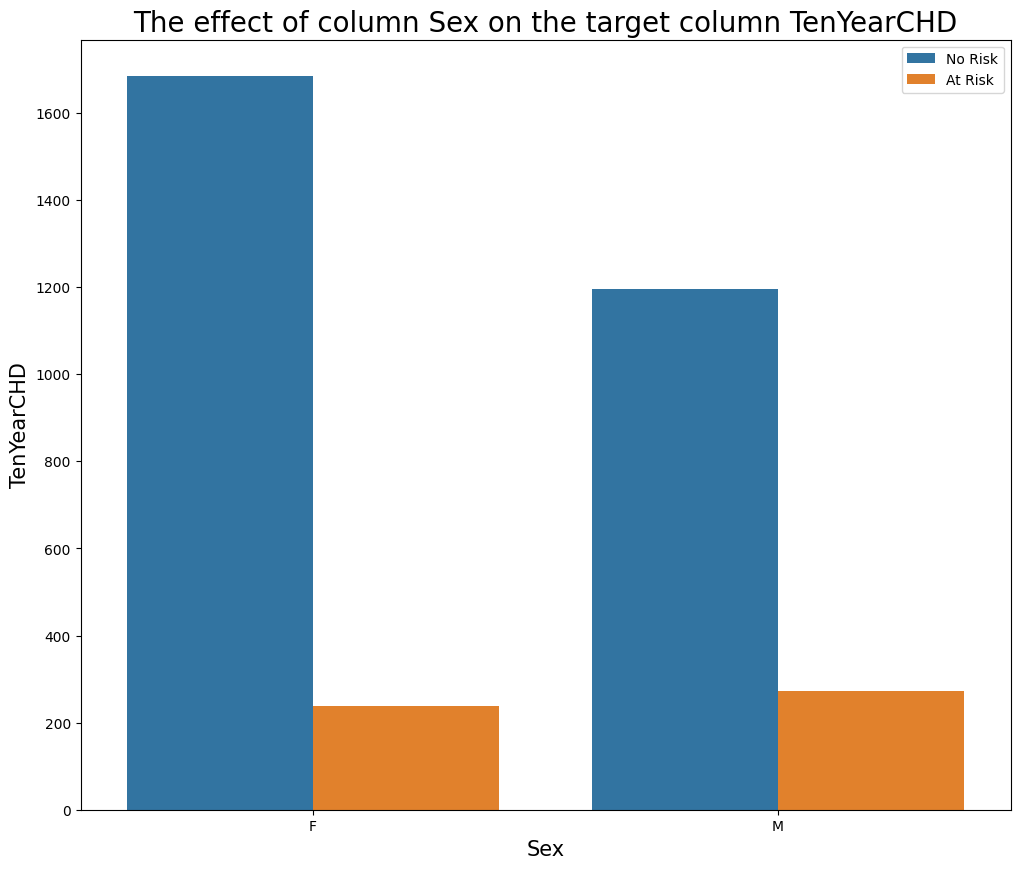


Analysis result: 
Being a Male increases the chances of a positive CHD risk factor by around 7%


In [ ]:
#Analysis of the Sex column
create_visualisation(col='sex',vis_type='countplot',percent=True,factor='Being a Male')

## **The effect of smoking on CHD risk:**

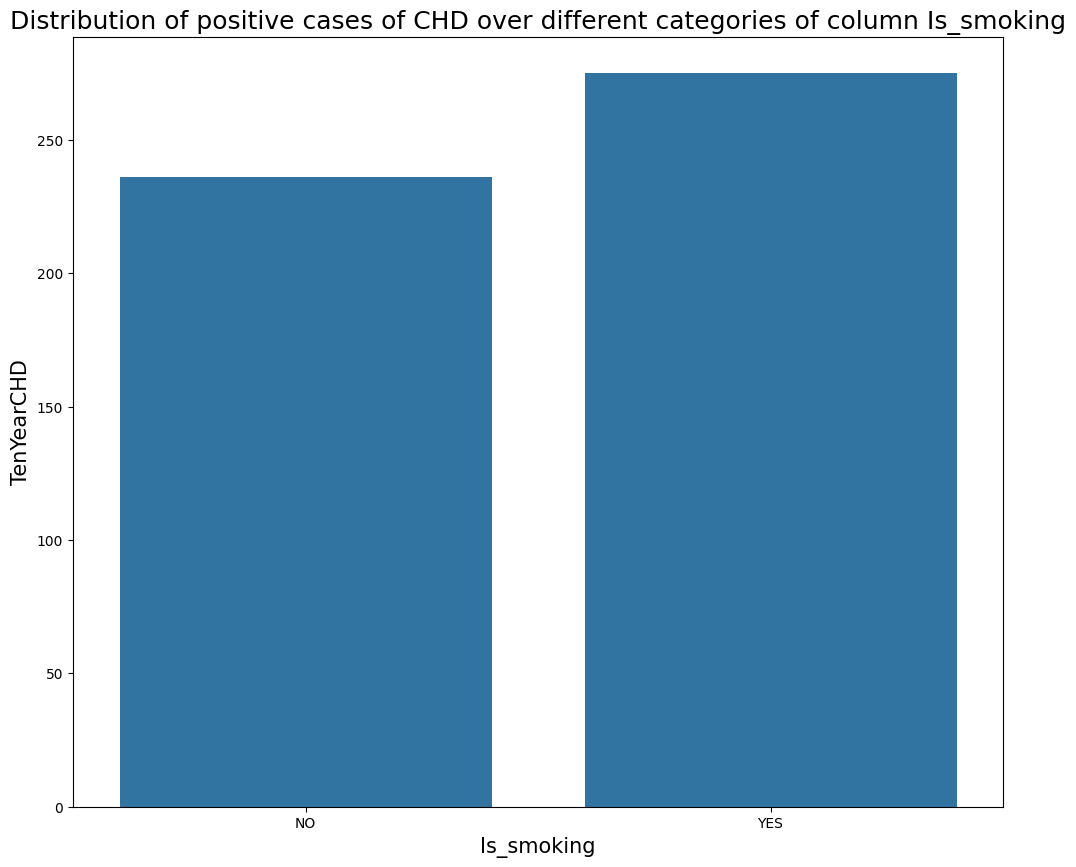


Analysis result: 
Smoking increases the chances of a positive CHD risk factor by around 3%


In [ ]:
#Analysis of the is_smoking column
create_visualisation(col='is_smoking',factor='Smoking',percent=True)

## **How does being on blood pressure medication affect the CHD risk factor:**


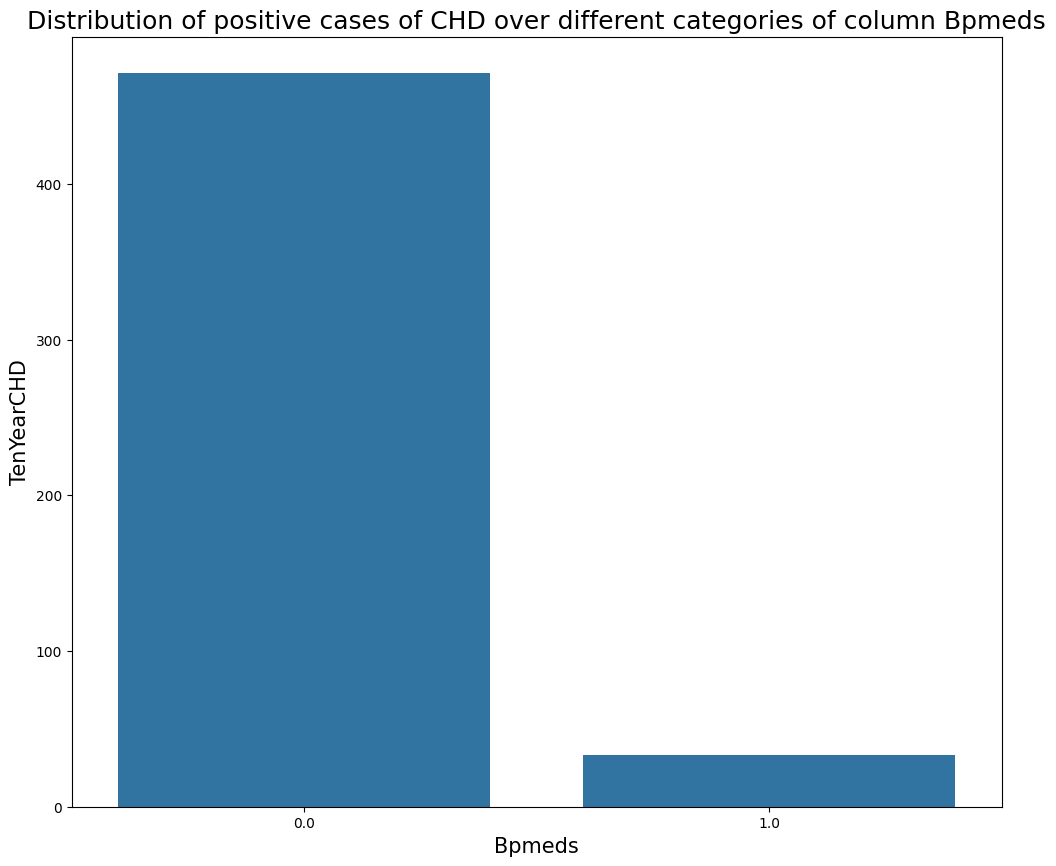


Analysis result: 
Having BP medications increases the chances of a positive CHD risk factor by around 19%


In [ ]:
#Analysis of the BPMeds column
create_visualisation(col='BPMeds',factor='Having BP medications',percent=True)

## **How does previous strokes affect future CHD risk:**

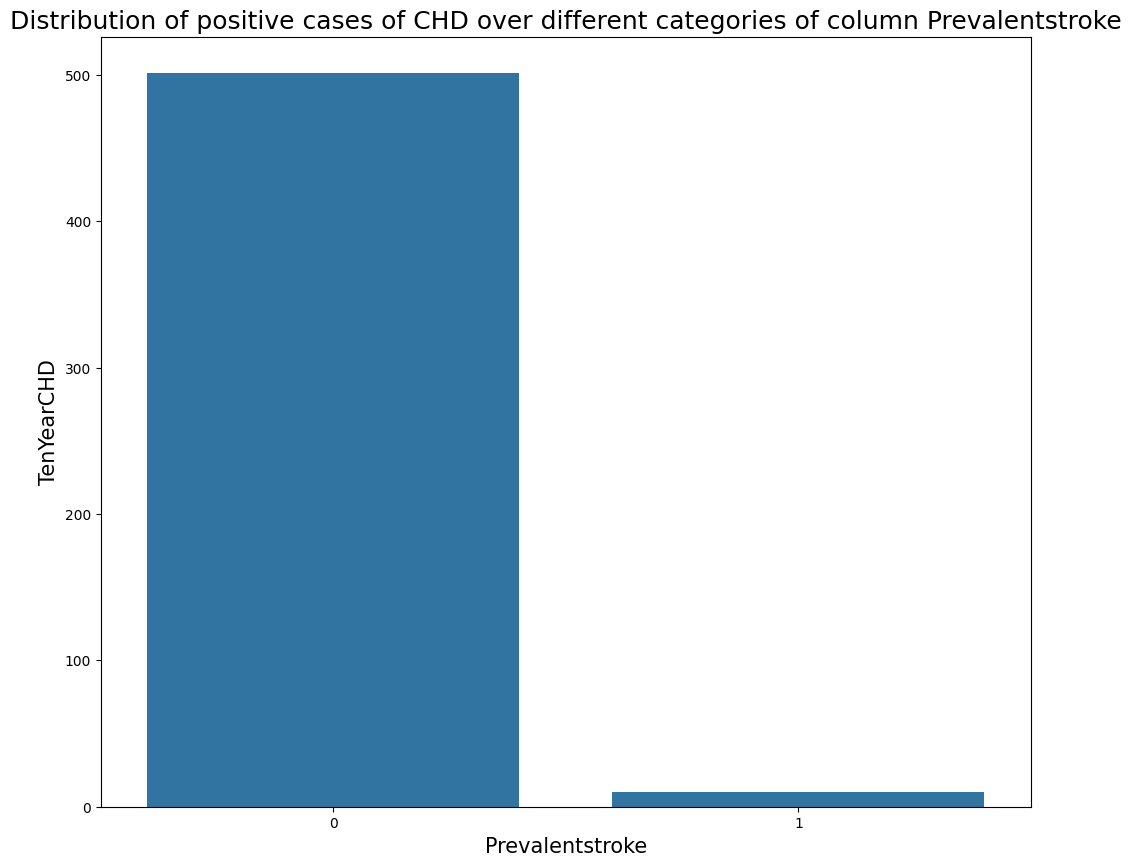


Analysis result: 
Having a prevalent stroke increases the chances of a positive CHD risk factor by around 31%


In [ ]:
#Analysis of the column prevalentStroke
create_visualisation(col='prevalentStroke', percent=True,factor='Having a prevalent stroke')

## **Does Diabetes affect the chances of having a positive CHD risk factor:**

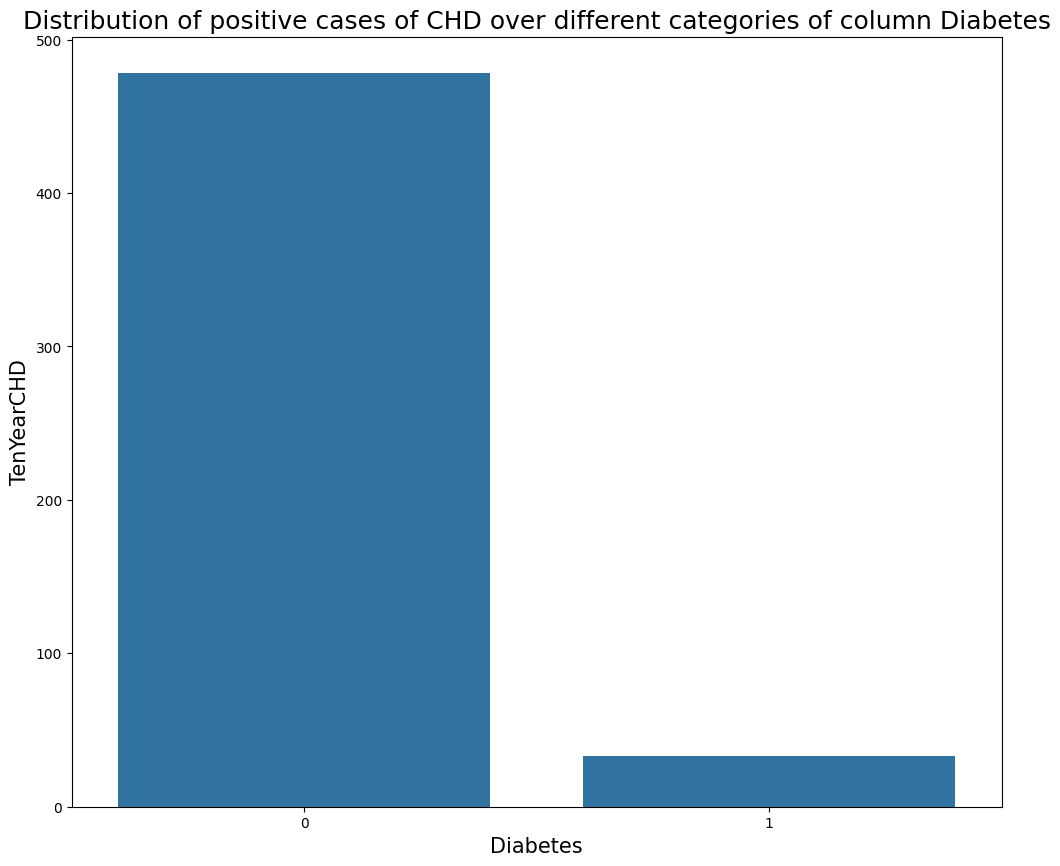


Analysis result: 
Diabetes increases the chances of a positive CHD risk factor by around 24%


In [ ]:
create_visualisation(col='diabetes',percent=True,factor='Diabetes')

## **The remaing columns are all current medical values. These values don't particularly signify a trend therefore I will just plot the number of positive cases for all the values each variable can take.**


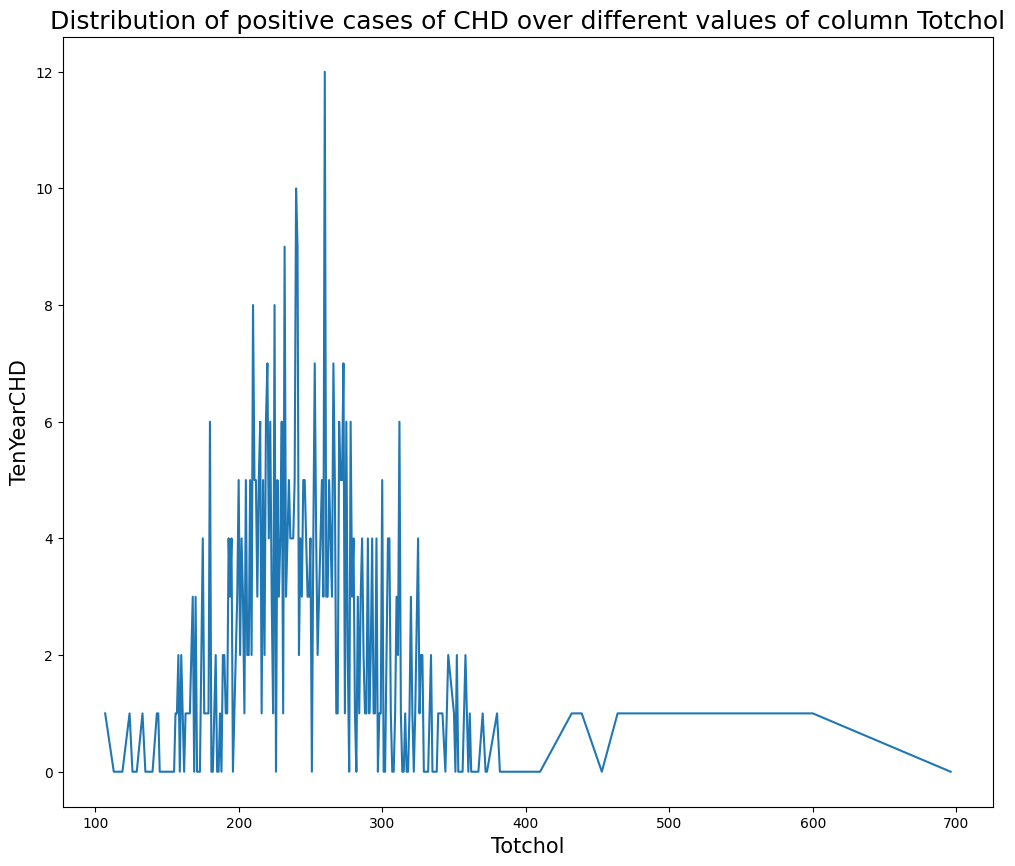

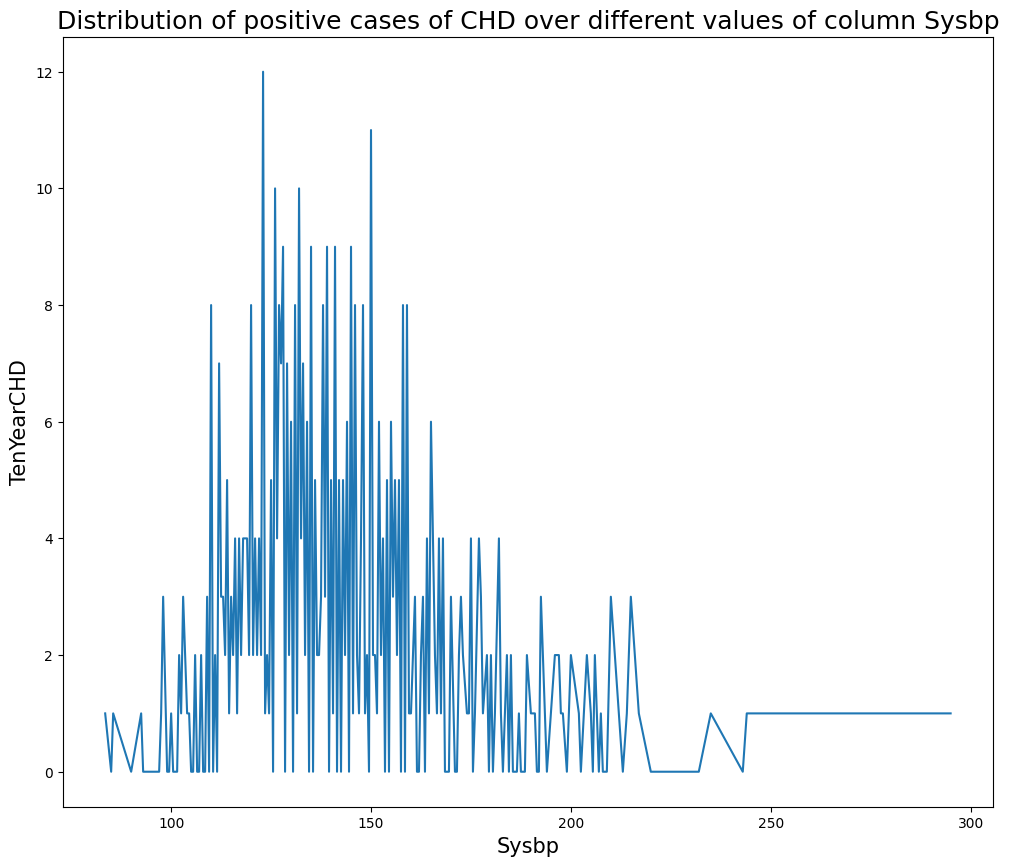

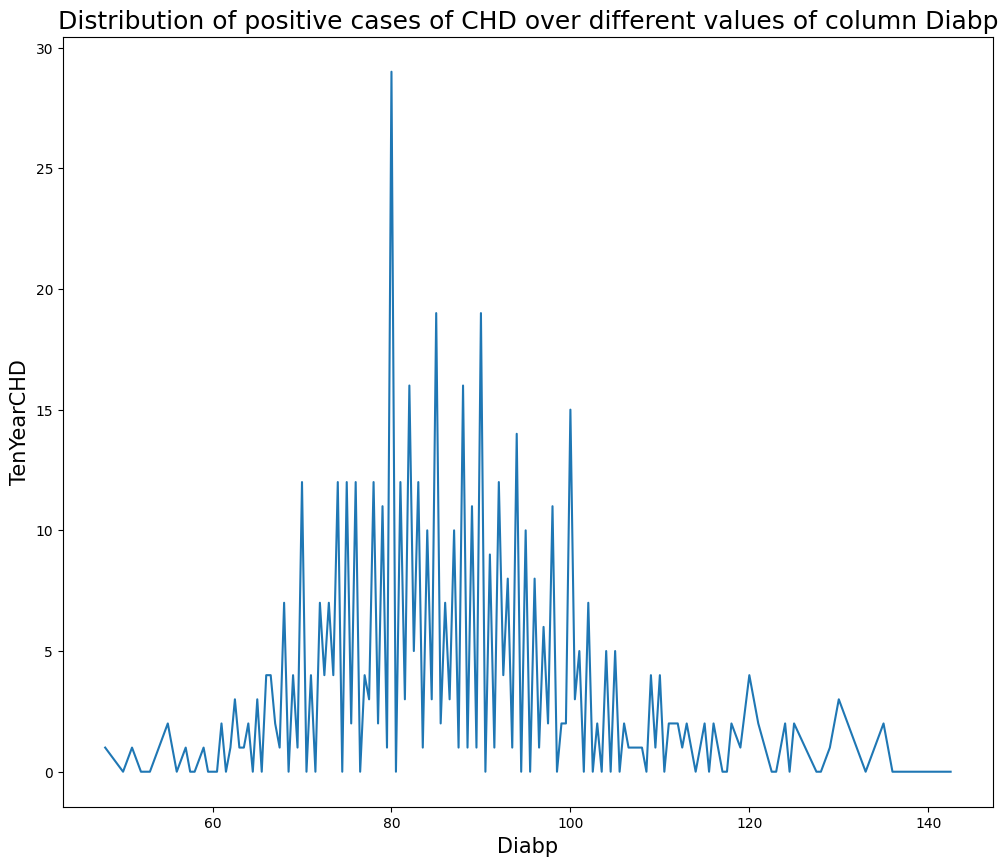

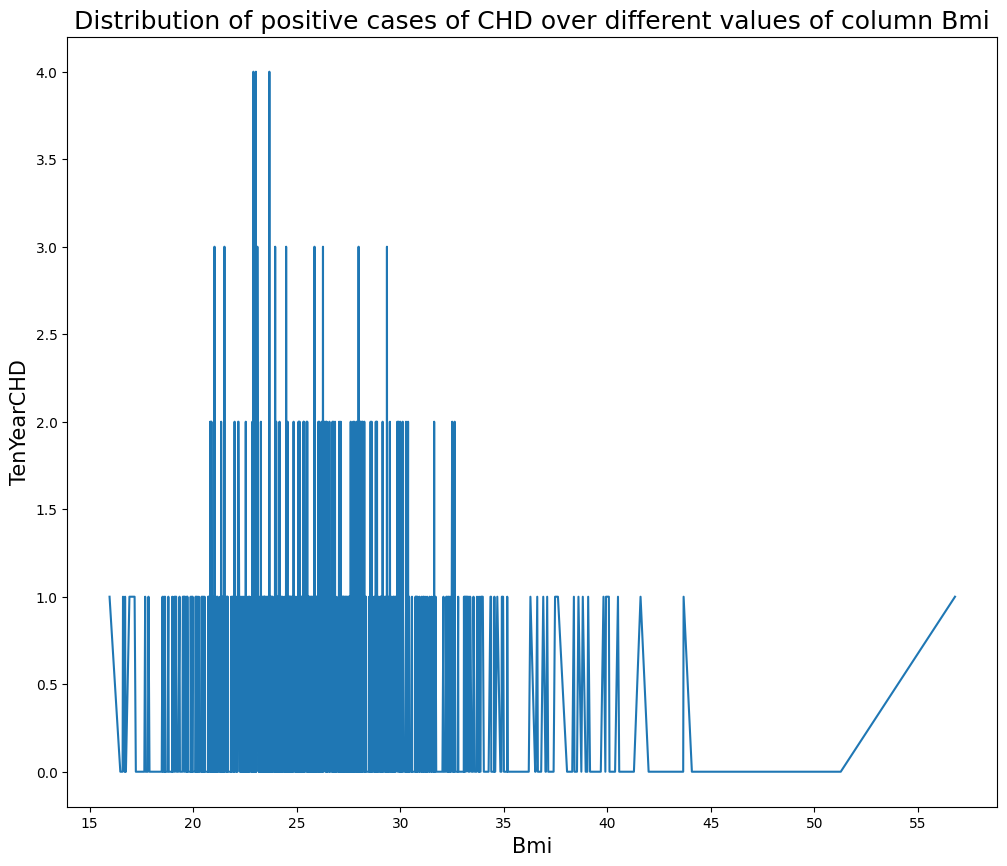

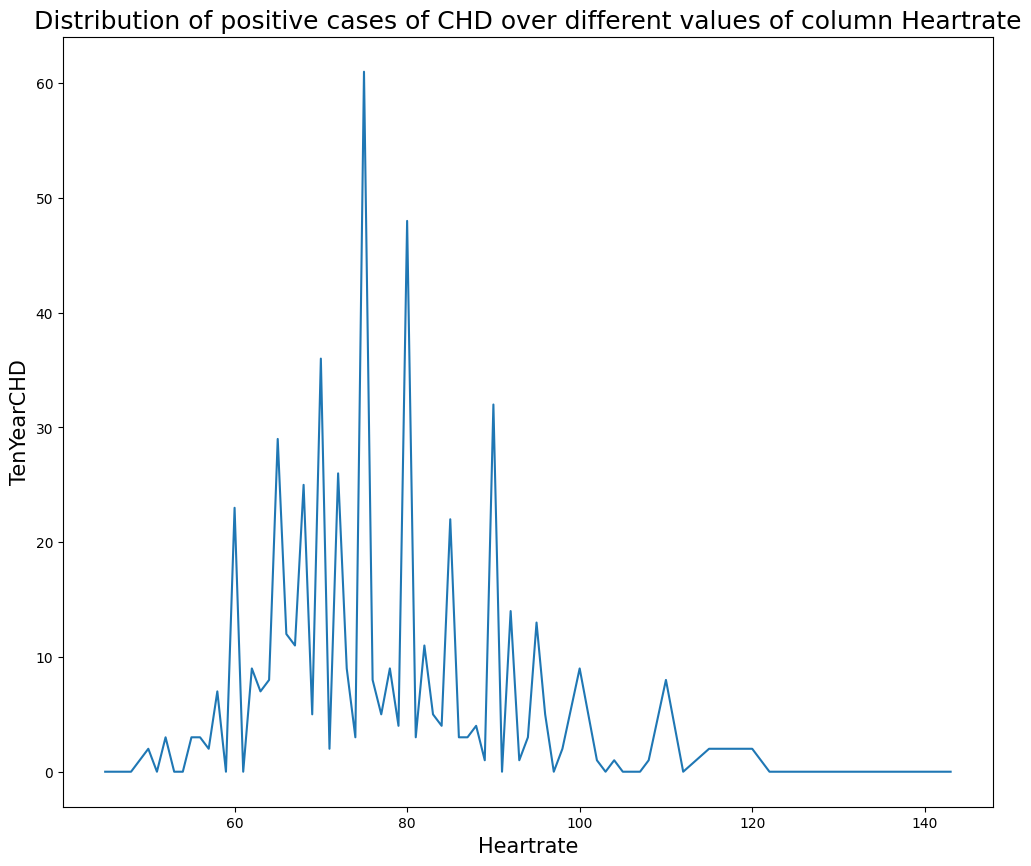

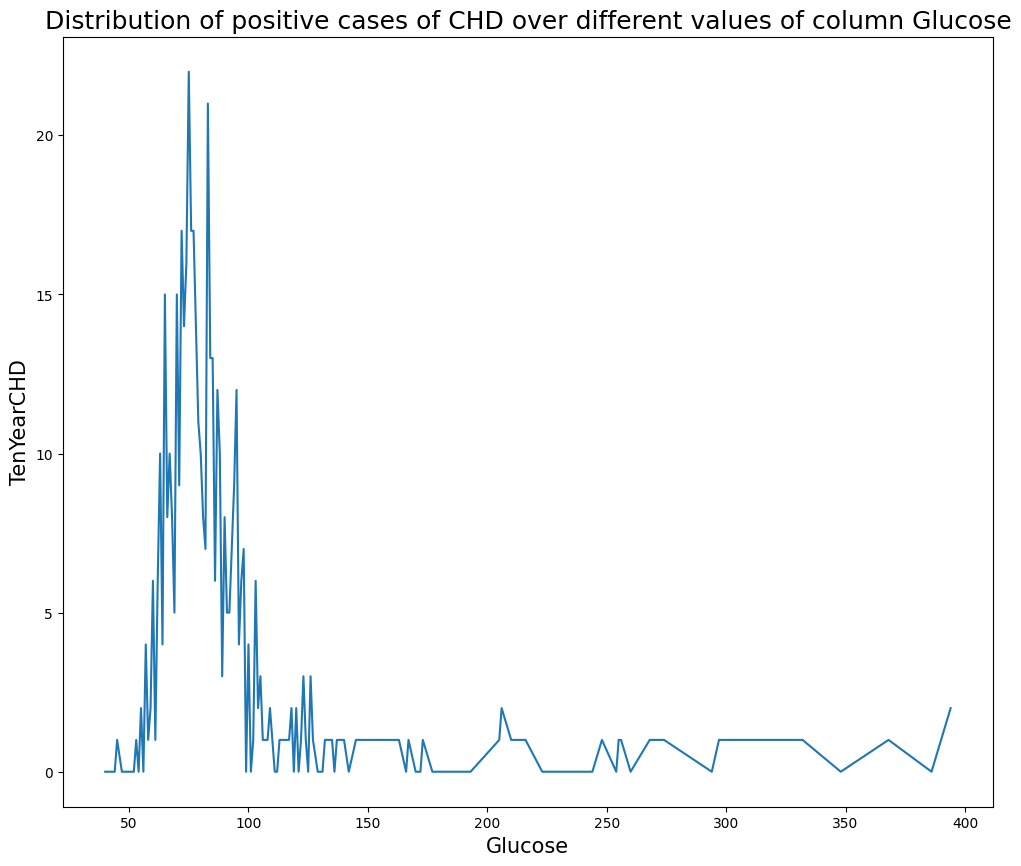

In [ ]:
#Analysis for the remaining (current medical details) columns
curr_med_list = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in curr_med_list:
  create_visualisation(col=col,vis_type='lineplot')

From the visualisations we can see that for all these variables, most of the positive cases are for the medium range, this is because the dataset mostly contains people with medium ranges for these variables. In theory, consistent high and low values for all these variables are dangerous and can have an increasing effect on the CHD risk factor.

The medium ranges for all these variables according to our data are:

* Total cholestrol: 170-310
* Systolic blood pressure: 100-180
* Diastolic blood pressure: 70-100
* BMI: 20-32
* Heart rate: 60-95
* Glucose: 50-110

## **3. Data Clean up:**

Handling null values:

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model.

Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [ ]:
#Checking for null values in our dataset
crp_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

I'll be using a mixed approach of imputing null values with some meaningfull value and deleting the observations with null values.

Since the glucose column has a lot of null values, I'll impute them with the mean glucose value. After this, the number of null values present will be of a very small order when compared to the size of the dataset, therefore I'll just delete them.

In [ ]:
#Imputing values for glucose column
mean = math.ceil(crp_df['glucose'].mean())     #getting the mean value of the glucose column
crp_df['glucose'].fillna(mean, inplace=True)   #Imputing the null values with mean value

In [ ]:
#Checking if the imputation worked
crp_df.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

Glucose column now has 0 null values, so our imputation has worked. Now we can delete the rest of the null values.

In [ ]:
#Deleting the rest of the null values
crp_df.dropna(inplace=True)

In [ ]:
#Checking if the null values are dropped properly
crp_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

As we can see, there are no more null values present, therefore we can move forward.

## **Handling duplicate values:**

When two features have the same set of values they are known as duplicate values.

Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.

The best way of dealing with duplicate values is to delete them.

In [ ]:
#Checking for duplicate values
crp_df.duplicated().sum()

0

As we can see there are no duplicate values, so we can move ahead.

## **Removing outliers:**

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [ ]:
#Defining a list with numerical columns that can have outliers
poss_outlier_cols = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

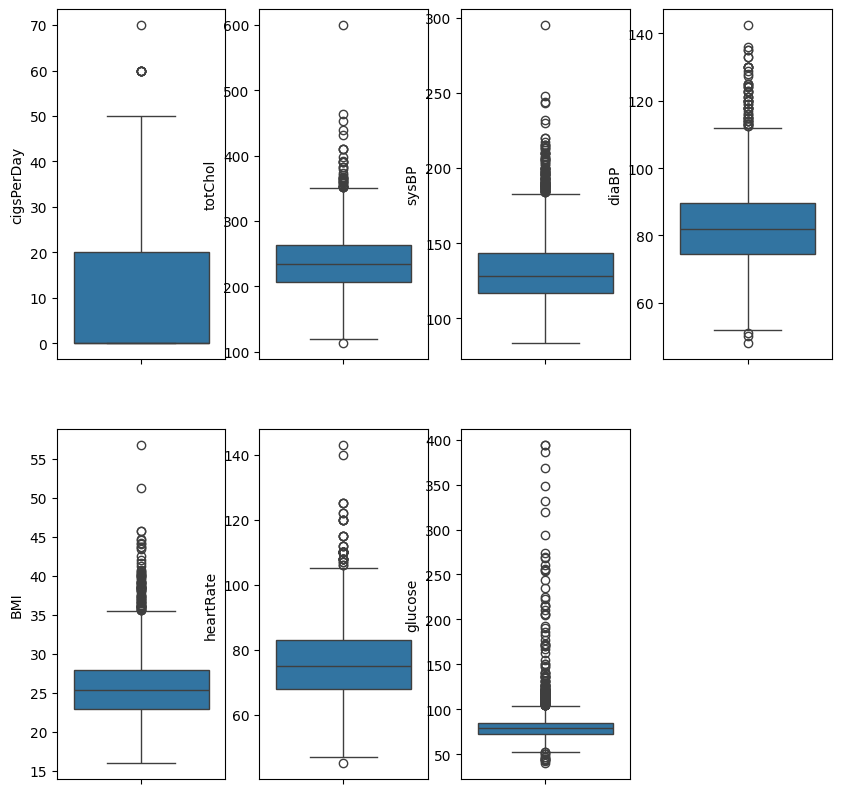

In [ ]:
#Visualising boxplots to find if columns contain outliers
plt.figure(figsize=(10,10))
for index,item in enumerate(poss_outlier_cols):
  plt.subplot(2,4,index+1)
  sns.boxplot(crp_df[item])

From the boxplots we can infer that all these columns have outliers, but practically speaking even though they are not "normal" observations, they are still possible. Ruling out such possible scenerios can be harmful for our prediction.

Therefore I will allow these outliers to be in the dataset.

## **4.Feature Engineering:**

### **Feature Encoding:**

Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as **Feature Encoding**

Here we have two columns that require encoding and they are "sex" and "is_smoking".

In [ ]:
#The dataframe before encoding
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
#Encoding the categorical columns
crp_df['sex'] = np.where(crp_df['sex']=='M',1,0)                                        #1st way to encode(using numpy library)
crp_df['is_smoking'] = crp_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)       #2nd way to encode(using the apply and lambda function)

In [ ]:

#Checking if the encoding has worked
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **Grouping columns for better understanding:**

There are many columns in this dataset. Some of them can be combined to give a better column which actually gives out better and precise information, which would also impact the prediction in a positive way.

### **a. SmokeLevel:**

At first we can combine the is_smoking and cigsPerDay column. If a person has cigsPerDay value as something greater than 0, then it obviously means he is a smoker. In that case the column is_smoking would be of no value.

Now I will combine both of these columns into a single column which would be an ordinal column called SmokeLevel that contains the level of smoking for each person.

In [ ]:
def smoke_level(cpd: float):
  """A function that returns the Smoking level
     by taking cigarettes per day as an input."""
  if cpd==0:                    #Non smoker
    return 1
  elif cpd>0 and cpd<=10:       #Smoker with more than 0 and less than 10 cigs per day
    return 2
  elif cpd>10 and cpd<=20:      #Smoker with more than 10 and less than 20 cigs per day
    return 3
  elif cpd>20 and cpd<=30:      #Smoker with more than 20 and less than 30 cigs per day
    return 4
  elif cpd>30 and cpd<=40:      #Smoker with more than 30 and less than 40 cigs per day
    return 5
  else:                         #Smoker with more than 40 cigs per day
    return 6


In [ ]:
#Creating the SmokeLevel column
crp_df['SmokeLevel'] = crp_df['cigsPerDay'].apply(lambda x: smoke_level(x))

In [ ]:
#Removing columns upon whom grouping has been done
crp_df.drop(columns={'is_smoking','cigsPerDay'},axis=1,inplace=True)

In [ ]:
#Checking if the new column creation has worked
crp_df.head()

,id,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,SmokeLevel
1,1,36,4.0,1,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1
2,2,46,1.0,0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,2
3,3,50,1.0,1,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,4,64,1.0,0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,4
5,5,61,3.0,0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1


As we can see, the new column "SmokeLevel" has been created with correct values.

### **b. BPLevel:**

Next, I will combine the "sysBP" and "diaBP" columns to create a new column called the "BPLevel".

Before diving into this step let us have a look at what are the BP levels defined by the American heart association.

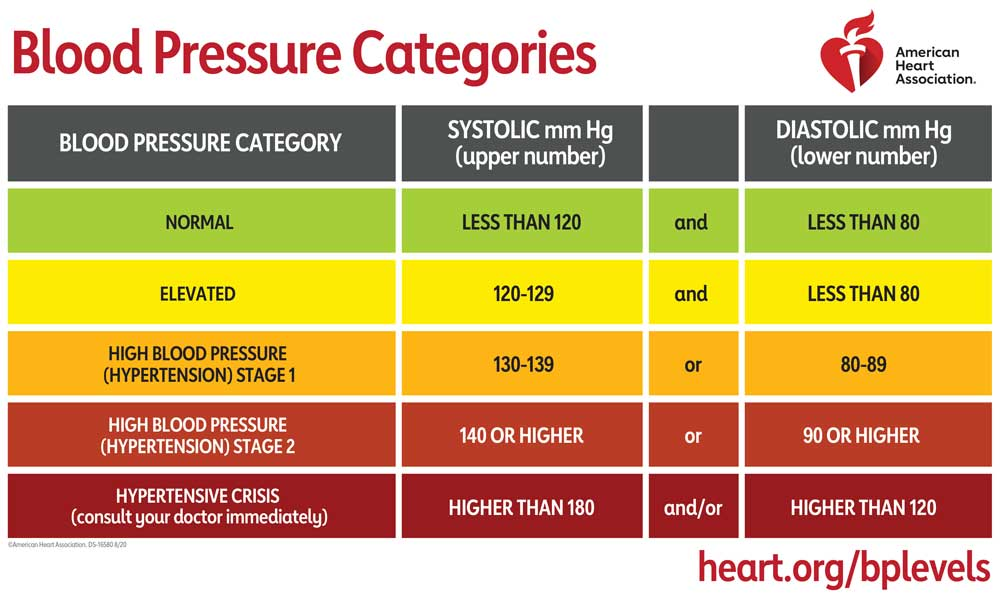

In [ ]:
def BPLevel_assigner(s: float,d:float):
  """A function that returns the Blood Pressure level by taking the
     Systolic blood pressure and Diastolic blood pressure as inputs"""
  if s<120 or d<80:                               #Normal level
    return 1
  elif (s>=120 and s<130) or d<80:                #Elevated level
    return 2
  elif (s>129 and s<140) or (d>79 and d<90):       #High BP stage 1
    return 3
  elif (s>139 and s<180) or (d<89 and d<120):      #High BP stage 2
    return 4
  elif s>179 or d>119:                             #Hypertensive crisis
    return 5

In [ ]:
#Creating the BPLevel column
crp_df['BPLevel'] = crp_df.apply(lambda x: BPLevel_assigner(x['sysBP'],x['diaBP']),axis=1)

In [ ]:
#Removing columns upon whom grouping has been done
crp_df.drop(columns={'sysBP','diaBP'},axis=1,inplace=True)

In [ ]:
#Checking if the BPLevel column is created properly
crp_df.head()

,id,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,SmokeLevel,BPLevel
1,1,36,4.0,1,0.0,0,1,0,212.0,29.77,72.0,75.0,0,1,4
2,2,46,1.0,0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,2,1
3,3,50,1.0,1,0.0,0,1,0,233.0,28.26,68.0,94.0,1,3,3
4,4,64,1.0,0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,4,3
5,5,61,3.0,0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,1,5


As we can see, the new column (BPLevel) has been created properly with the correct values.

### **c. DiabetesLevel:**

Atlast, I'll convert the "glucose" column to a column called "DiabetesLevel". This would enable us to remove the glucose column and the diabetes column.

Let's have a look at the different Diabetes levels according to different glucose levels.

).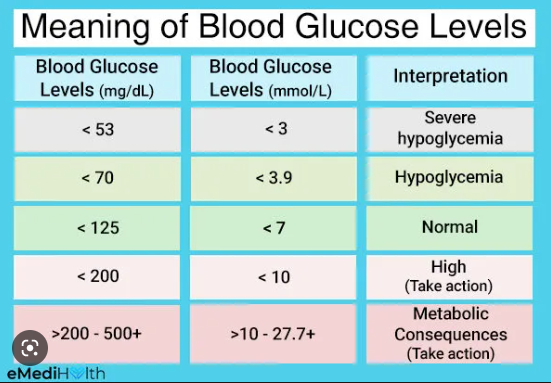

In [ ]:
def DiabetesLevel_assigner(g:float):
  """A function that returns the DiabetesLevel
     by taking blood glucose levels as an input."""
  if g<53:                      #Severe Hypoglycemia
    return 1
  elif g>52 and g<70:           #Hypoglycemia
    return 2
  elif g>69 and g<125:          #Normal
    return 3
  elif g>124 and g<200:         #Pre Diabetic
    return 4
  elif g>199:                   #Severe Diabetes
    return 5

In [ ]:
#Creating the Diabetes Level column
crp_df['DiabetesLevel'] = crp_df['glucose'].apply(lambda x: DiabetesLevel_assigner(x))

In [ ]:
#Removing columns upon whom grouping has been done
crp_df.drop(columns={'diabetes','glucose'},axis=1,inplace=True)

In [ ]:
#Checking if the DiabetesLevel column has been created properly
crp_df.head()

,id,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,TenYearCHD,SmokeLevel,BPLevel,DiabetesLevel
1,1,36,4.0,1,0.0,0,1,212.0,29.77,72.0,0,1,4,3
2,2,46,1.0,0,0.0,0,0,250.0,20.35,88.0,0,2,1,3
3,3,50,1.0,1,0.0,0,1,233.0,28.26,68.0,1,3,3,3
4,4,64,1.0,0,0.0,0,0,241.0,26.42,70.0,0,4,3,3
5,5,61,3.0,0,0.0,0,1,272.0,32.80,85.0,1,1,5,2


As we can see the "DiabetesLevel" column has been created properly and with correct values.

### **Checking correlation for feature removal:**

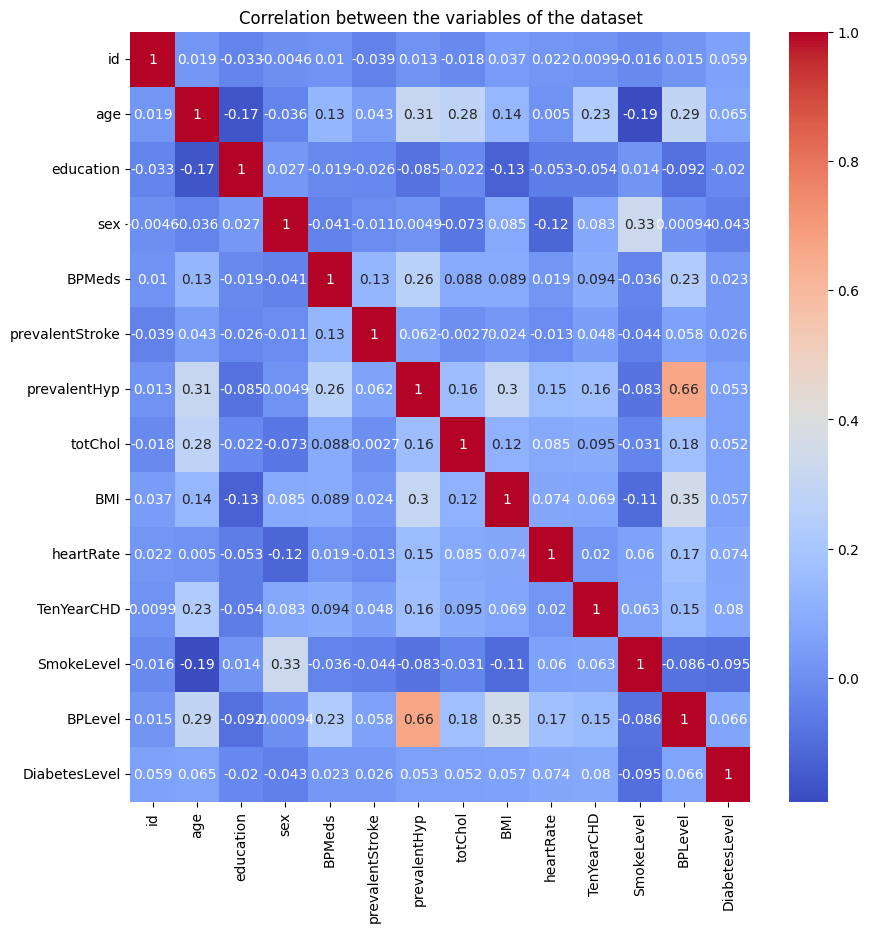

In [ ]:
#Plotting correlation matrix using sns.heatmap()
corr_matrix = crp_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation between the variables of the dataset")
plt.show()


As we can see, for majority of the variables there is no high correlation. But, we can also see that there is high correlation between "prevalentHyp" and "BPLevel". Practically speaking there is a direct relation between the two medically and therefore we can remove one of them. I'll remove the "prevalentHyp" column.

In [ ]:
#Removing the prevalentHyp column to reduce correlation
crp_df.drop('prevalentHyp',axis=1,inplace=True)

### **Checking the distribution of the data**

This is done so that we can remove varibales that will not contribute significantly in predicting the target variable.

In [ ]:
#Creating a list of all the independent variables
idp_cols=list(set(crp_df.columns)-{'TenYearCHD'})

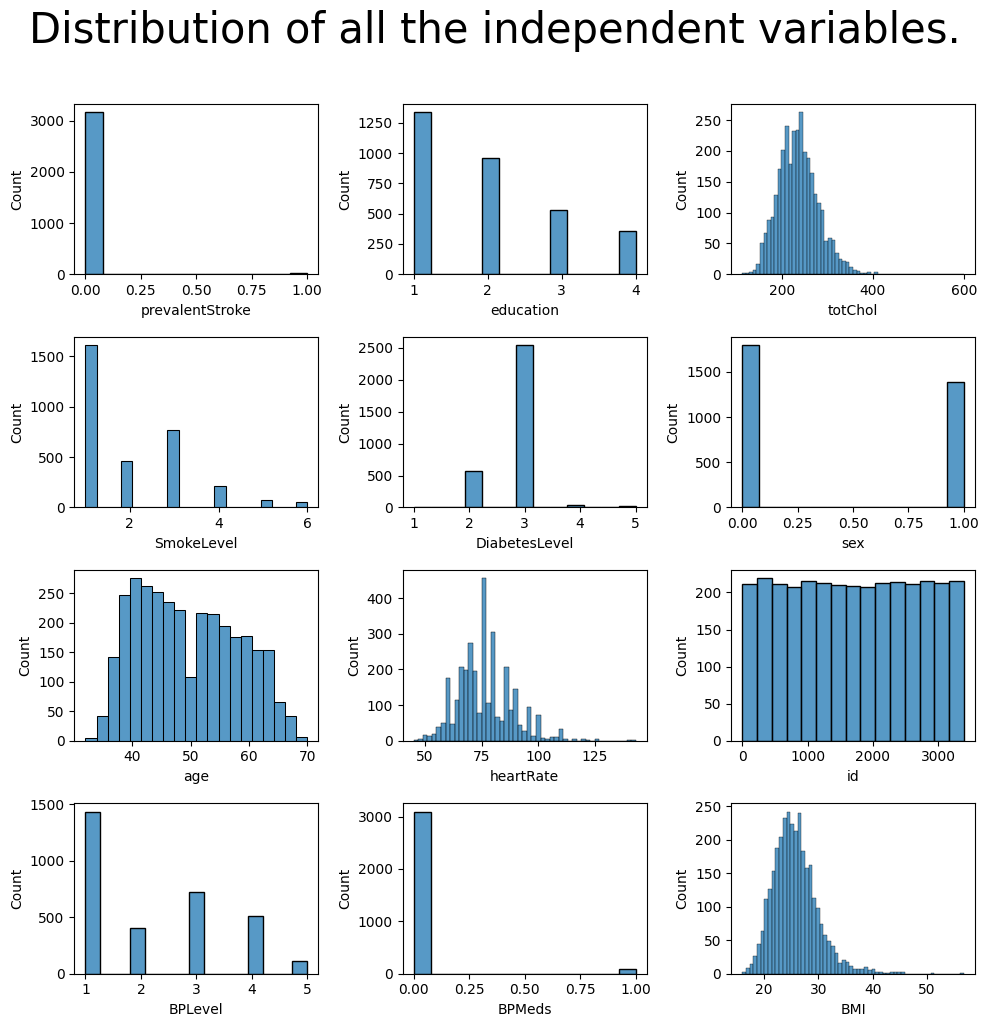

In [ ]:
#Plotting the distribution of the independent variables using sns.histplot()
plt.figure(figsize=(10,10))
plt.suptitle('Distribution of all the independent variables.',va='bottom',size=30)
for index, item in enumerate(idp_cols):
  plt.subplot(4,3,index+1)
  sns.histplot(data=crp_df,x=item)
plt.tight_layout()

As we can see from the distribution, there is a high class imbalance for the columns BPMeds and prevalentStroke, so they won't be able to impact the prediction of the target variable much and therefore we'll delete them.

From the EDA process we also saw that Education is not a great contributing factor, therefore I'll remove the education column also.

In [ ]:
#Removing useless columns
crp_df.drop(columns={'BPMeds','prevalentStroke','education'},axis=1,inplace=True)

## **5. Pre processing of the data:**

### **Dealing with class imbalance:**

A dataset is imbalanced if the classification categories are not approximately equally represented. This affects the quality of our machine larning model and also causes a mistake of classifying the minority class as the majority class. Therefore we will try to deal with this class imbalance if it exists in our dataset.

In [ ]:
#Checking for class imbalance for the target variable
crp_df['TenYearCHD'].value_counts()


TenYearCHD
0    2714
1     475
Name: count, dtype: int64

As we can see, there is a high class imbalance here.

Techniques to solve class imbalance:

1. Resampling (undersampling or oversampling)
2. SMOTE
3. Using BalancedBaggingClassifier.
4. and many more....

In this project, to deal with class imbalance I will be using the SMOTE technique(synthetic minority oversampling technique).

### **SMOTE:**

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.

In [ ]:
# Drop the 'id' column if it exists
if 'id' in crp_df.columns:
    crp_df.drop('id', axis=1, inplace=True)

# Creating X and Y variables
X = crp_df.drop('TenYearCHD', axis=1)
Y = crp_df['TenYearCHD'].reset_index(drop=True)

In [ ]:
#Applying the smote technique to solve class imbalance
smote = SMOTE(sampling_strategy='minority')
X_sm , Y_sm = smote.fit_resample(X,Y)

In [ ]:
X_sm.head()

,age,sex,totChol,BMI,heartRate,SmokeLevel,BPLevel,DiabetesLevel
0,36,1,212.0,29.77,72.0,1,4,3
1,46,0,250.0,20.35,88.0,2,1,3
2,50,1,233.0,28.26,68.0,3,3,3
3,64,0,241.0,26.42,70.0,4,3,3
4,61,0,272.0,32.80,85.0,1,5,2


In [ ]:
#Checking the unique value counts after applying SMOTE
Y_sm.value_counts()

TenYearCHD
0    2714
1    2714
Name: count, dtype: int64

As we can see, the class imbalance has been completely removed.

### **Splitting and scaling the data:**

In [ ]:
#Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X_sm,Y_sm,test_size=0.25,random_state=12)


**Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [ ]:
def scale_data(data: pd.DataFrame):
  """A function that takes in a dataframe and returns
     another dataframe where the data it contains is scaled"""
  scaler = StandardScaler()
  columns = list(data.columns)
  scaled_data = scaler.fit_transform(data)
  final_data = pd.DataFrame(scaled_data,columns=columns)
  return final_data


In [ ]:
#Scaling the independent dataset
X_train = scale_data(X_train)
X_test = scale_data(X_test)

## **6. Model Implementation:**


Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with a classification problem, therefore we will be using classification models. Some popular examples are Logistic Regression and Naive Bayes.

In this project we will be including the following models:

1. Logistic regression.
2. Decision tree classifier.
3. Random forest classifier.
4. Gradient Boosting classifier.

**Note:**

All these models have similar training and predicting processes, so writing code for each one of them seperately makes it quite boring and lengthy. To solve this problem we can use the concept of ML pipelines. To implement this I will be using functions to execute the ML model trainings and also to evaluate the ML models.

In [ ]:
def model_evaluator(actual: pd.DataFrame, preds: np.ndarray, ml_model: str='Logistic Regression', mode: str='train', cm: bool=True, cf: bool=True):
    """Evaluate model performance by displaying confusion matrix, ROCAUC score, and classification report."""

    if cm:
        # Confusion matrix
        cm = confusion_matrix(actual, preds)
        print(f"The confusion matrix for {ml_model} on the {mode} set is:\n{cm}\n")
        plot_confusion_matrix(cm, ml_model, mode)

    # ROCAUC score
    roc_auc = roc_auc_score(actual, preds)
    print(f"The ROCAUC score for {ml_model} on the {mode} set is: {roc_auc}\n")

    if cf:
        # Classification report
        clf_report = classification_report(actual, preds, target_names=['No Risk', 'At Risk'], output_dict=True)
        print(f"The classification report for {ml_model} on the {mode} set is:\n{classification_report(actual, preds)}\n")
        plot_classification_report(clf_report, ml_model, mode)


def plot_confusion_matrix(cm, ml_model, mode):
    """Plot confusion matrix."""
    labels = ['No Risk', 'At Risk']
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.title(f'Confusion matrix for {ml_model} on the {mode} set')
    plt.xticks(ticks=[0.5, 1.5], labels=labels)
    plt.yticks(ticks=[0.5, 1.5], labels=labels)
    plt.show()


def plot_classification_report(clf_report, ml_model, mode):
    """Plot classification report."""
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
    plt.title(f'Classification report for the {ml_model} model on the {mode} data')
    plt.show()

In [ ]:
def model_pipeline(X_train:pd.DataFrame,X_test:pd.DataFrame,Y_train:pd.DataFrame,Y_test:pd.DataFrame,ml_model: str,param_grid:dict={0:0},kind:str='evaluate'):
  """A function that takes the training and testing data and trains
     it using the specified ML model, makes the prediction and returns
     the evaluation metrics by using other functoins."""

  #Creating a global variable to use it outside the function
  global model
  #Logistic regression
  if ml_model == 'Logistic Regression':
    model = LogisticRegression(fit_intercept=True,max_iter=10000)

  elif ml_model in ['Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier']:
     #Training initial Decision tree classifier
     if ml_model == 'Decision Tree Classifier':
       model_init = DecisionTreeClassifier(random_state=0)

     #Training initial Random Forest Classifier
     elif ml_model=='Random Forest Classifier':
       model_init = RandomForestClassifier()

     elif ml_model == 'Gradient Boosting Classifier':
       model_init = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

     #Applying GridSearchCV on the initial model to find best parameters.
     gs_model = GridSearchCV(estimator=model_init,param_grid=param_grid,cv=5,scoring='roc_auc',verbose=True)
     gs_model.fit(X_train,Y_train)

     #Printing the best parameters
     print("The best parameters for",ml_model,'are:',(gs_model.best_params_),'\n')

     #Generating a new model with best parameters.
     model = gs_model.best_estimator_

  else:
    print("Enter correct model name. \n 1.Logistic Regression or, \n2.Decision Tree Classifier or, 3.Random Forest Classifier or,\n4.Gradient Boosting Classifier.")

  #Training the model with the right parameters
  model.fit(X_train,Y_train)

  #Making the predictions
  train_predictions = model.predict(X_train)
  test_predictions = model.predict(X_test)

  if kind == 'evaluate':
     #Getting the confusion matrix, ROCAUC score and classification report for the train and test set
     print("1. Train set evaluation:")
     model_evaluator(Y_train,train_predictions,ml_model=ml_model,mode='Train')
     print("\n2. Test set evaluation:")
     model_evaluator(Y_test,test_predictions,ml_model=ml_model,mode='Test')

  #Returning values for model explainability process
  elif kind == 'model_explainability':
    return model

## **Logistic regression:**
This is a type of statistical model that is used in classification problems and also predictive analysis. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables.

1. Train set evaluation:
The confusion matrix for Logistic Regression on the Train set is:
[[1306  734]
 [ 687 1344]]



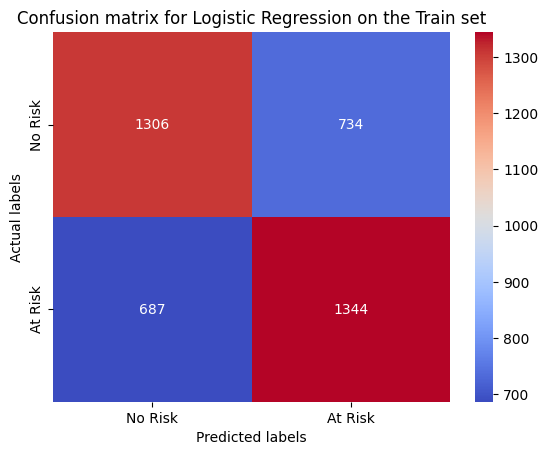

The ROCAUC score for Logistic Regression on the Train set is: 0.6509695310916094

The classification report for Logistic Regression on the Train set is:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2040
           1       0.65      0.66      0.65      2031

    accuracy                           0.65      4071
   macro avg       0.65      0.65      0.65      4071
weighted avg       0.65      0.65      0.65      4071




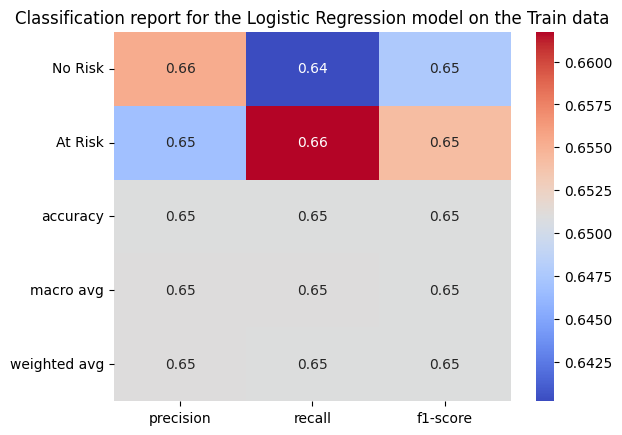


2. Test set evaluation:
The confusion matrix for Logistic Regression on the Test set is:
[[414 260]
 [238 445]]



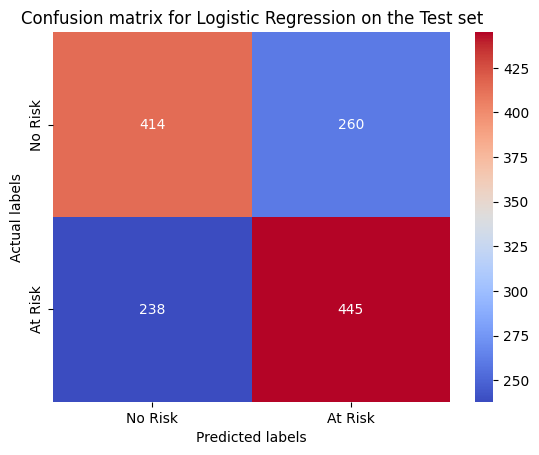

The ROCAUC score for Logistic Regression on the Test set is: 0.6328903293638208

The classification report for Logistic Regression on the Test set is:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       674
           1       0.63      0.65      0.64       683

    accuracy                           0.63      1357
   macro avg       0.63      0.63      0.63      1357
weighted avg       0.63      0.63      0.63      1357




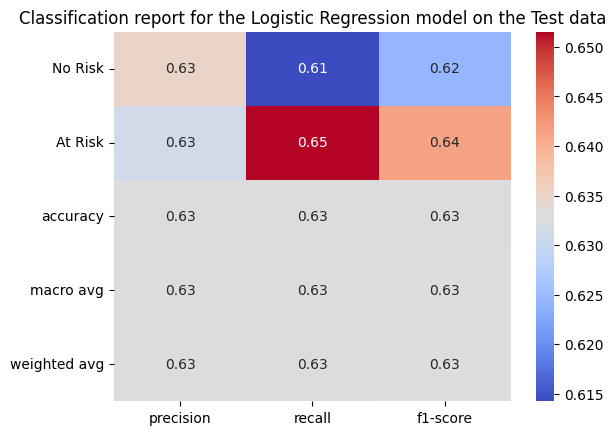

In [ ]:
#Calling the model pipeline to train and display the evaluation results for Linear regression.
model_pipeline(X_train,X_test,Y_train,Y_test,ml_model='Logistic Regression')

## **Decision Tree classifier:**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

Fitting 5 folds for each of 120 candidates, totalling 600 fits
The best parameters for Decision Tree Classifier are: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 65} 

1. Train set evaluation:
The confusion matrix for Decision Tree Classifier on the Train set is:
[[1293  747]
 [ 414 1617]]



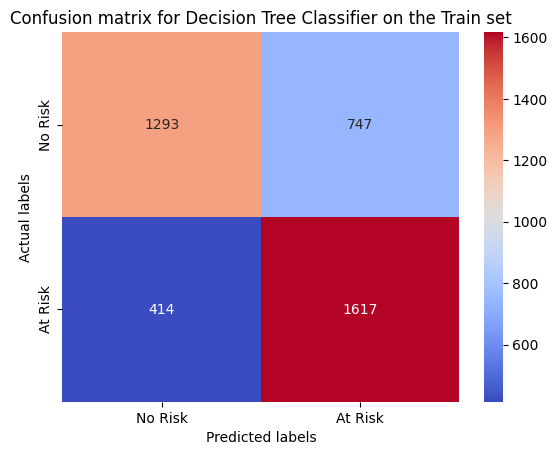

The ROCAUC score for Decision Tree Classifier on the Train set is: 0.7149915283691024

The classification report for Decision Tree Classifier on the Train set is:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      2040
           1       0.68      0.80      0.74      2031

    accuracy                           0.71      4071
   macro avg       0.72      0.71      0.71      4071
weighted avg       0.72      0.71      0.71      4071




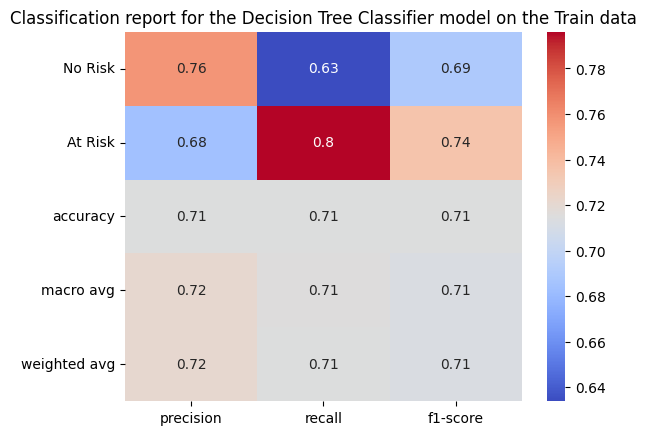


2. Test set evaluation:
The confusion matrix for Decision Tree Classifier on the Test set is:
[[379 295]
 [153 530]]



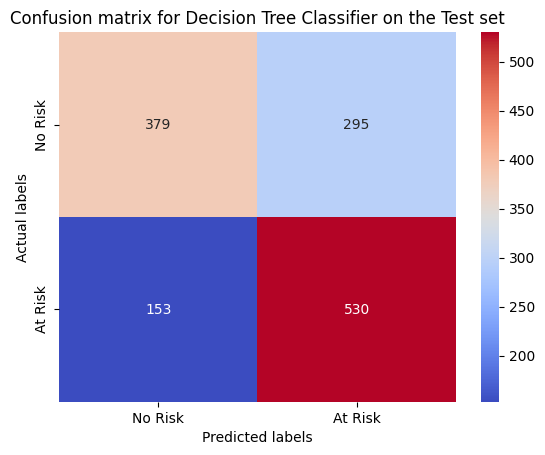

The ROCAUC score for Decision Tree Classifier on the Test set is: 0.6691514135143003

The classification report for Decision Tree Classifier on the Test set is:
              precision    recall  f1-score   support

           0       0.71      0.56      0.63       674
           1       0.64      0.78      0.70       683

    accuracy                           0.67      1357
   macro avg       0.68      0.67      0.67      1357
weighted avg       0.68      0.67      0.67      1357




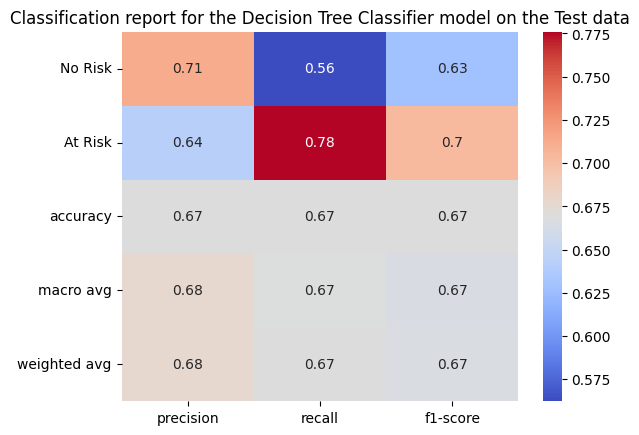

In [ ]:
#Calling the model pipeline to train and display the evaluation results for Decision tree classifier.
model_pipeline(X_train,X_test,Y_train,Y_test,ml_model='Decision Tree Classifier',\
               param_grid={'max_features': ['auto', 'sqrt', 'log2'],'max_leaf_nodes':[45,50,55,60,65],\
                           'max_depth':[4,5,6,7],'criterion':['entropy','gini']}\
               ,kind='evaluate')

## **Random Forest Classifier:**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Fitting 5 folds for each of 25 candidates, totalling 125 fits
The best parameters for Random Forest Classifier are: {'max_depth': 10, 'n_estimators': 65} 

1. Train set evaluation:
The confusion matrix for Random Forest Classifier on the Train set is:
[[1729  311]
 [ 131 1900]]



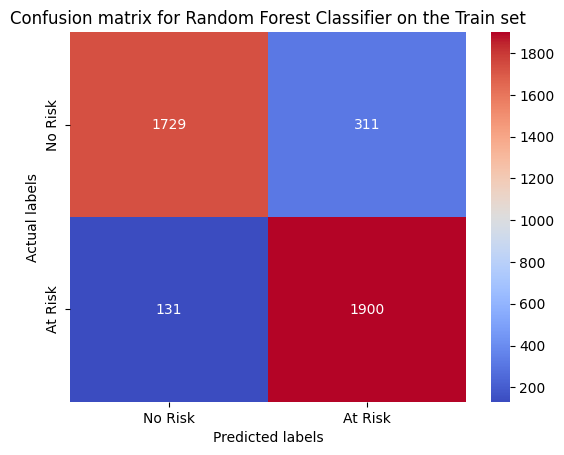

The ROCAUC score for Random Forest Classifier on the Train set is: 0.8915243867118486

The classification report for Random Forest Classifier on the Train set is:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      2040
           1       0.86      0.94      0.90      2031

    accuracy                           0.89      4071
   macro avg       0.89      0.89      0.89      4071
weighted avg       0.89      0.89      0.89      4071




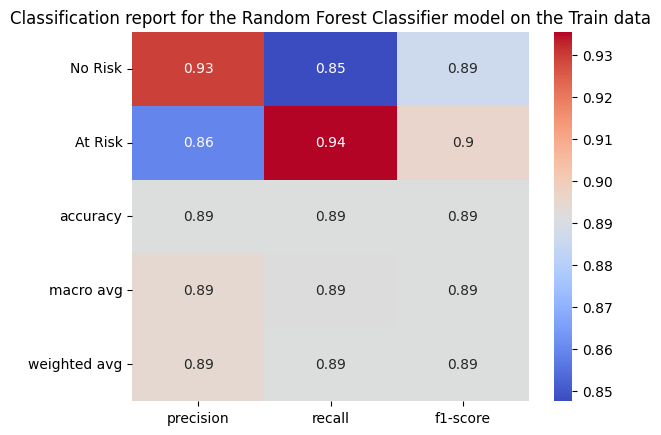


2. Test set evaluation:
The confusion matrix for Random Forest Classifier on the Test set is:
[[443 231]
 [ 99 584]]



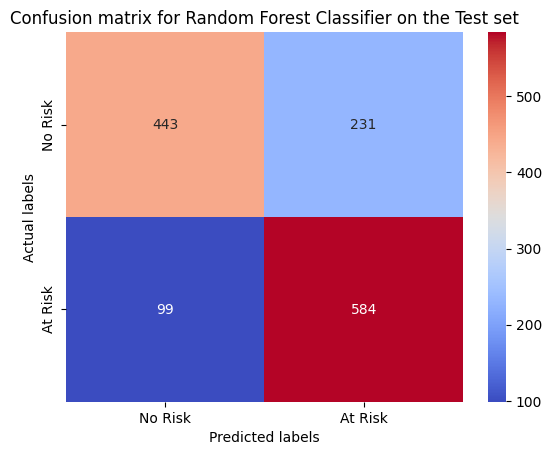

The ROCAUC score for Random Forest Classifier on the Test set is: 0.7561606370915537

The classification report for Random Forest Classifier on the Test set is:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       674
           1       0.72      0.86      0.78       683

    accuracy                           0.76      1357
   macro avg       0.77      0.76      0.75      1357
weighted avg       0.77      0.76      0.75      1357




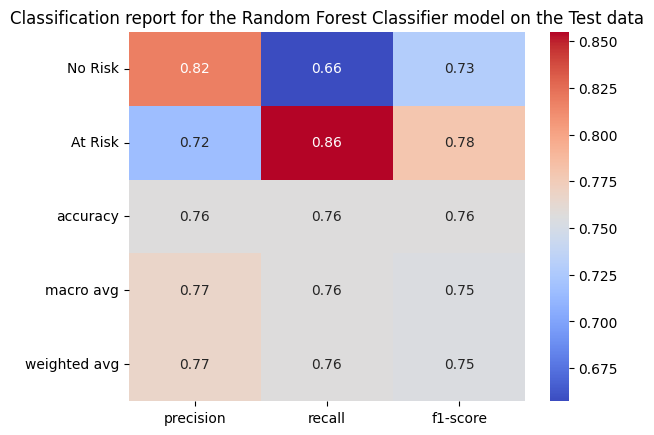

In [ ]:
#Calling the model pipeline to train and display the evaluation results for Random forest classifier.
model_pipeline(X_train,X_test,Y_train,Y_test, ml_model='Random Forest Classifier',\
               param_grid={'n_estimators':[50, 65, 80, 95,120],'max_depth':[3, 5, 7,9,10]}\
               ,kind='evaluate')

## **Gradient Boosting Classifier:**

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss.

Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best parameters for Gradient Boosting Classifier are: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100} 

1. Train set evaluation:
The confusion matrix for Gradient Boosting Classifier on the Train set is:
[[2008   32]
 [  41 1990]]



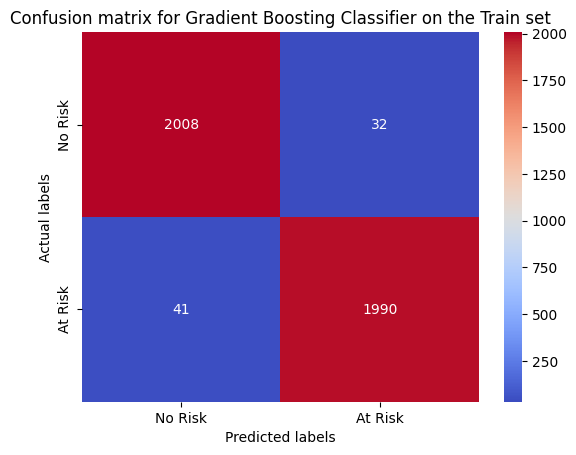

The ROCAUC score for Gradient Boosting Classifier on the Train set is: 0.9820633127697165

The classification report for Gradient Boosting Classifier on the Train set is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2040
           1       0.98      0.98      0.98      2031

    accuracy                           0.98      4071
   macro avg       0.98      0.98      0.98      4071
weighted avg       0.98      0.98      0.98      4071




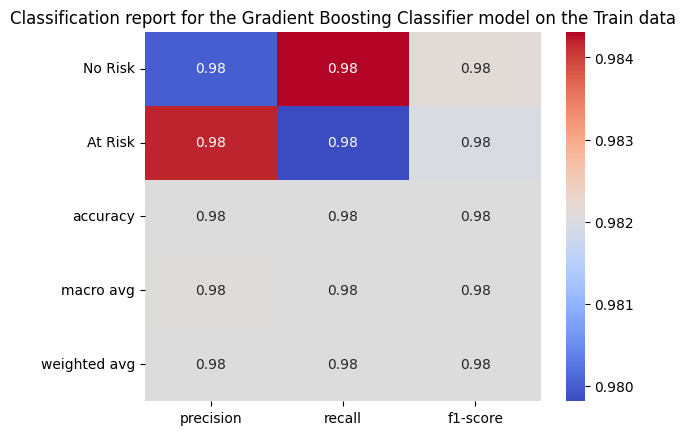


2. Test set evaluation:
The confusion matrix for Gradient Boosting Classifier on the Test set is:
[[359 315]
 [ 55 628]]



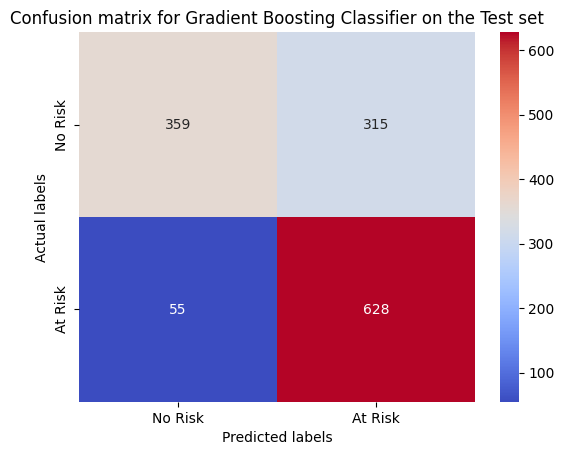

The ROCAUC score for Gradient Boosting Classifier on the Test set is: 0.7260569315856473

The classification report for Gradient Boosting Classifier on the Test set is:
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       674
           1       0.67      0.92      0.77       683

    accuracy                           0.73      1357
   macro avg       0.77      0.73      0.72      1357
weighted avg       0.77      0.73      0.72      1357




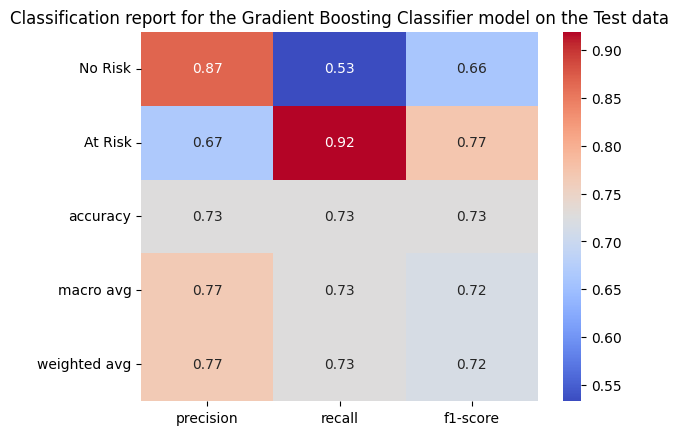

In [ ]:
#Calling the model pipeline to train and display the evaluation results for Gradient Boosting classifier.
model_pipeline(X_train,X_test,Y_train,Y_test, ml_model='Gradient Boosting Classifier',\
               param_grid={'n_estimators':[80,100], 'max_depth':[5,7,8],'learning_rate':[0.001,0.01,0.05]}\
               ,kind='evaluate')

## **7. Model explainability:**

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

1. ELI-5
2. LIME
3. SHAP

In this project, I'll be using the SHAP library for explaining the logistic Regression model. For Random Forest, Decision tree and Gradient Boosting Classifier models I'll use their own attribute, .feature_importances_ , to explain them.

## **Logistic Regression:**

In [ ]:
#Installing the shap library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.4 MB/s eta 0:00:00


In [ ]:
#Importing the SHAP library
import shap

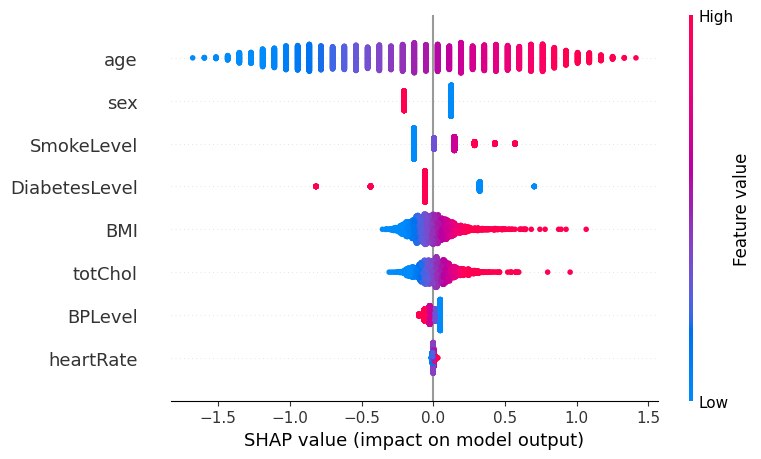

In [ ]:
#Creating an object for the logistic regression model
lr_classifier = model_pipeline(X_train,X_test,Y_train,Y_test, ml_model='Logistic Regression',kind='model_explainability')

#Plotting the shap summary plot
explainer_shap = shap.Explainer(model=model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train)
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

## **Decision tree classifier:**

In [ ]:
def feature_importance(model):
  """A function to plot the feature importance."""
  features = X.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)
  plt.figure(figsize=(10,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

In [ ]:
#Obtaining the trained model object for explainability
dt_classifier = model_pipeline(X_train,X_test,Y_train,Y_test,ml_model='Decision Tree Classifier',\
               param_grid={'max_features': ['auto', 'sqrt', 'log2'],'max_leaf_nodes':[45,50,55,60,65],\
                           'max_depth':[4,5,6,7],'criterion':['entropy','gini']}\
               ,kind='model_explainability')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
The best parameters for Decision Tree Classifier are: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 65} 



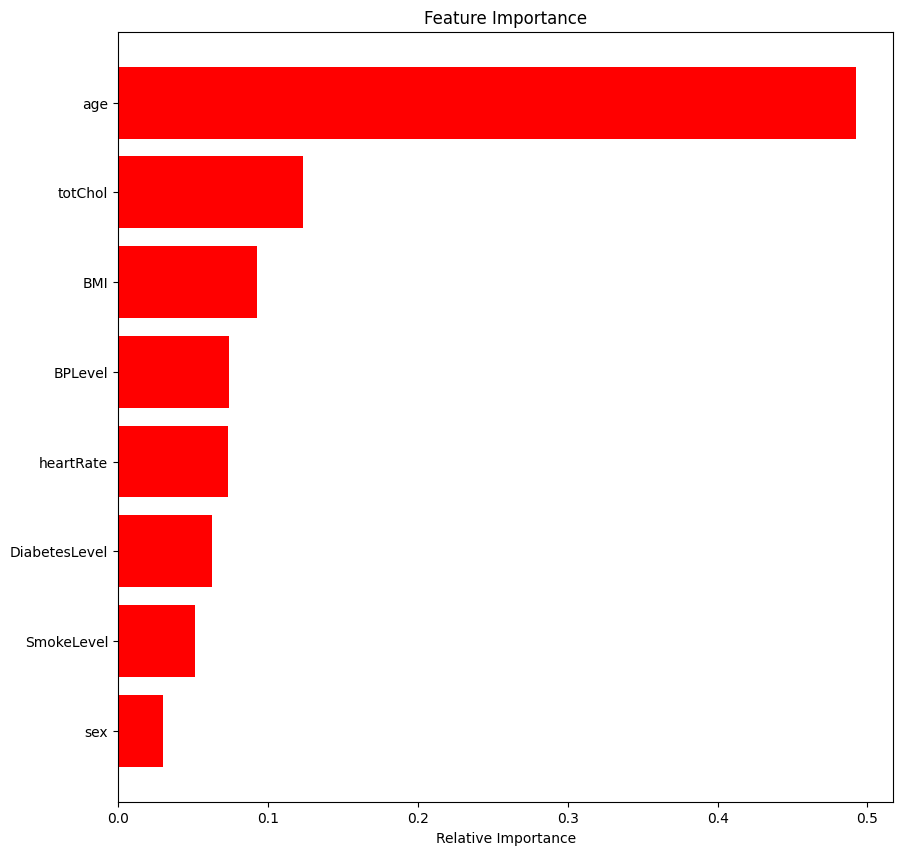

In [ ]:
#Plotting the feature importance for Decision tree classifier
feature_importance(dt_classifier)

## **Random forest classifier:**

In [ ]:
#Obtaining the trained model object for explainability
rf_classifier = model_pipeline(X_train,X_test,Y_train,Y_test, ml_model='Random Forest Classifier',\
                                     param_grid={'n_estimators':[50, 65, 80, 95,120],'max_depth':[3, 5, 7,9,12]}\
                                     ,kind='model_explainability')

Fitting 5 folds for each of 25 candidates, totalling 125 fits
The best parameters for Random Forest Classifier are: {'max_depth': 12, 'n_estimators': 120} 



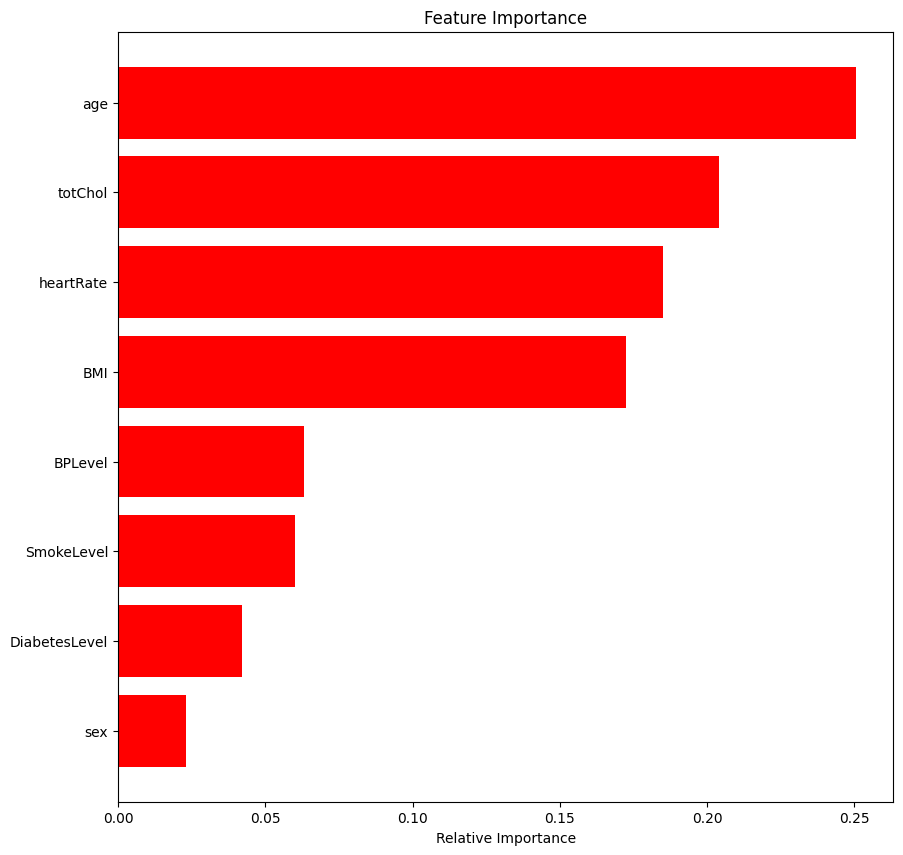

In [ ]:
#Plotting the feature importance for Random Forest classifier
feature_importance(rf_classifier)

## **Gradient Boosting Classifier:**


In [ ]:
#Obtaining the trained model object for explainability
gb_classifier = model_pipeline(X_train,X_test,Y_train,Y_test, ml_model='Gradient Boosting Classifier',\
                                           param_grid={'n_estimators':[80,100], 'max_depth':[5,7,8],\
                                                       'learning_rate':[0.001,0.01,0.05]},kind='model_explainability')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
The best parameters for Gradient Boosting Classifier are: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100} 



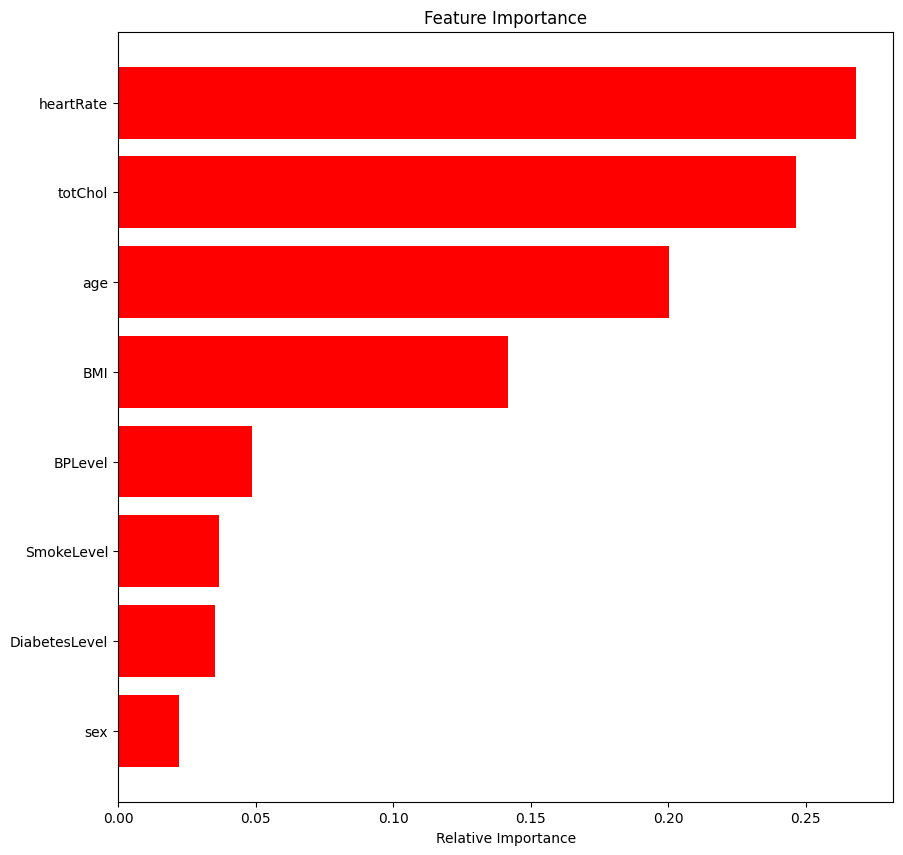

In [ ]:
#Plotting the feature importance for Gradient Boosting classifier
feature_importance(gb_classifier)

## **Summary:**

## **EDA insights:**
* The age group that is most likely to have a positive CHD risk factor is 47-65.
* Education level is not a great factor to determine the CHD risk factor.
* Males have a 7% greater chance of having a positive CHD risk factor.
* Smoking increases the chances of a positive CHD risk factor by around 3%.
* Having BP medications increases the chances of a positive CHD risk factor by around 19%.
* Having a prevalent stroke increases the chances of a positive CHD risk factor by around 31%.
* Prevalent Hypertension increases the chances of a positive CHD risk factor by around 13%.
* Diabetes increases the chances of a positive CHD risk factor by around 24%.

## **Results from ML models:**


* Logistic regression gives a ROCAUC score of 0.6365 on the testing set. This is worst performing model.
* Decision tree model gives a ROCAUC score of 0.6617 on the testing set.
* Random Forest Classifier model gives a ROCAUC score of 0.7584 on the testing set. This is the best performing model.
* Gradient Boosting Classifier model gives a ROCAUC score of 0.7416 on the testing set.
* Classification report and confusion matrix has been plotted for all the models.
* Model explainability has been achieved by SHAP library's summary plot and an attribute called feature_importances_ of the tree based algorithms.
* Total cholestrol and age are the two most important factors to predict the CHD risk factor.

## **Challenges faced:**

* Feature engineering.
* Handling class imbalance.
* Choosing model explainability techniques.
* Running the slow Gradient Boosting Classifier.